In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [32]:
file_path = "Heart_Disease_Prediction.csv" 
heart_df = pd.read_csv("Heart_Disease_Prediction.csv")
print(heart_df.head())


   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [33]:
heart_df.columns = [col.strip().replace(" ", "_") for col in heart_df.columns]
heart_df["Heart_Disease"] = heart_df["Heart_Disease"].map({"Presence": 1, "Absence": 0})

In [34]:
categorical_cols = ["Sex", "Chest_pain_type", "FBS_over_120", "EKG_results", 
                    "Exercise_angina", "Slope_of_ST", "Thallium"]
for col in categorical_cols:
    heart_df[col] = heart_df[col].astype("category").cat.codes

In [35]:
X = heart_df.drop("Heart_Disease", axis=1)
y = heart_df["Heart_Disease"]

In [36]:
print(X)

     Age  Sex  Chest_pain_type   BP  Cholesterol  FBS_over_120  EKG_results  \
0     70    1                3  130          322             0            2   
1     67    0                2  115          564             0            2   
2     57    1                1  124          261             0            0   
3     64    1                3  128          263             0            0   
4     74    0                1  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                2  172          199             1            0   
266   44    1                1  120          263             0            0   
267   56    0                1  140          294             0            2   
268   57    1                3  140          192             0            0   
269   67    1                3  160          286             0            2   

     Max_HR  Exercise_angina  ST_depression  Slope_

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train, X_test, y_train, y_test)

     Age  Sex  Chest_pain_type   BP  Cholesterol  FBS_over_120  EKG_results  \
78    42    0                2  120          209             0            0   
121   54    1                3  122          286             0            2   
27    51    0                2  120          295             0            2   
198   69    0                0  140          239             0            0   
218   54    1                2  120          258             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
86    62    1                1  128          208             1            2   
109   45    0                1  112          160             0            0   
225   41    1                1  135          203             0            0   
128   52    1                1  134          201             0            0   
130   63    0                3  108          269             0            0   

     Max_HR  Exercise_angina  ST_depression  Slope_

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(y_pred)


[0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1]


In [44]:
print(accuracy)

0.8148148148148148


In [46]:
feature_importances = rf_model.feature_importances_
print(feature_importances)

[0.08334104 0.04510182 0.12943583 0.07172686 0.09445215 0.00921045
 0.01669073 0.11836565 0.05043796 0.10980235 0.06216493 0.10840459
 0.10086564]


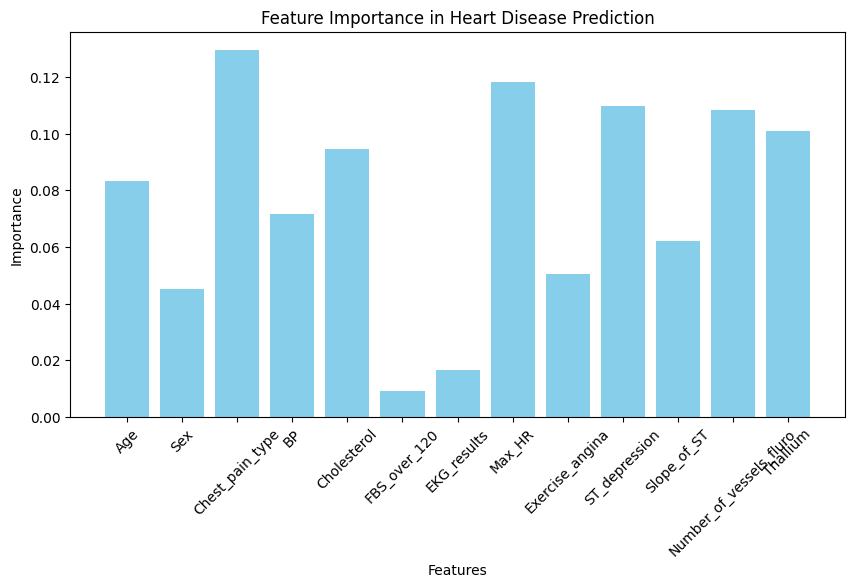

In [47]:
plt.figure(figsize=(10, 5))
plt.bar(X.columns, feature_importances, color="skyblue")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Heart Disease Prediction")
plt.xticks(rotation=45)
plt.show()

In [48]:
most_important_feature = X.columns[np.argmax(feature_importances)]
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Most Important Feature: {most_important_feature}")

Accuracy: 81.48%
Most Important Feature: Chest_pain_type
